## 1) k-Means on a randomly generated dataset

* Keep 6000 random points \\
* The number of centers to generate should be initially 4 \\
* The standard deviation of the clusters should be 0.9 \\

a) Display the scatter plot of the randomly generated data.

b) Initialize the KMeans model and display the plot after k-means clustering.

c) Try to cluster the above random dataset into 3 clusters. and display the plot after clustering.


Ques-  What is the optimal number of clusters? Use appropriate method/methods to find optimal number of clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
num_points = 6000
centers = 4
std_dev = 0.9
data = []

In [3]:
for i in range(centers):
    center = np.random.uniform(-10, 10, 2)
    cluster_points = np.random.normal(center, std_dev, (num_points // centers, 2))
    data.append(cluster_points)
data = np.vstack(data)

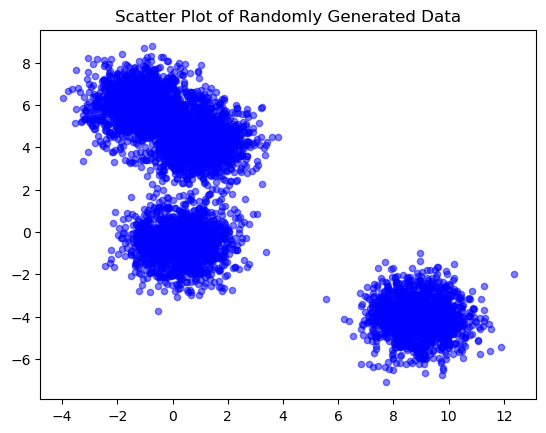

In [5]:
plt.scatter(data[:, 0], data[:, 1], s=20, color='blue', alpha=0.5)
plt.title("Scatter Plot of Randomly Generated Data")
plt.show()

In [7]:
def kmeans(data, k, max_iters=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for _ in range(max_iters):
        distances = np.sqrt(((data - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels
centroids_4, labels_4 = kmeans(data, 4)

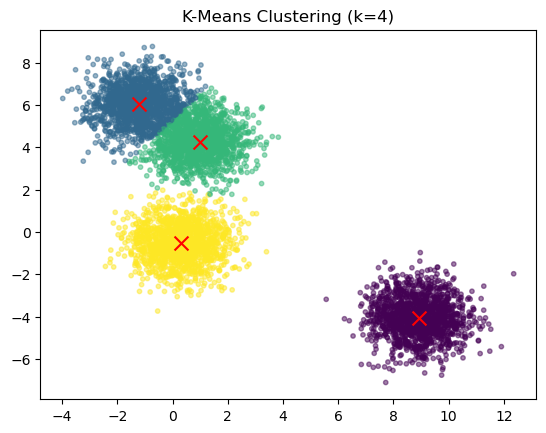

In [8]:
plt.scatter(data[:, 0], data[:, 1], c=labels_4, cmap='viridis', s=10, alpha=0.5)
plt.scatter(centroids_4[:, 0], centroids_4[:, 1], color='red', marker='x', s=100)
plt.title("K-Means Clustering (k=4)")
plt.show()

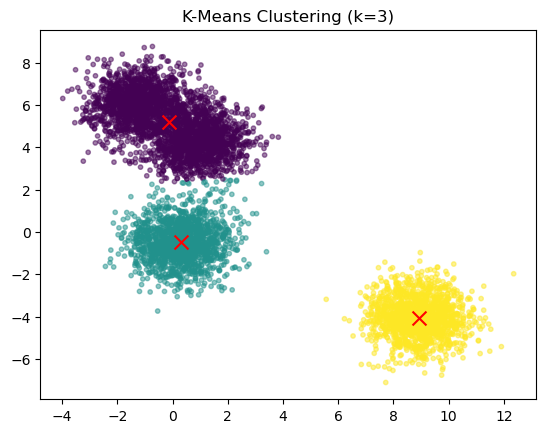

In [9]:
centroids_3, labels_3 = kmeans(data, 3)

plt.scatter(data[:, 0], data[:, 1], c=labels_3, cmap='viridis', s=10, alpha=0.5)
plt.scatter(centroids_3[:, 0], centroids_3[:, 1], color='red', marker='x', s=100)
plt.title("K-Means Clustering (k=3)")
plt.show()

### So in this we are using 2 methods to check the optimal number of clusters : Elbow Method and Average Silhouette Method

In [16]:
def calculate_wcss(data, centroids, labels):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        wcss += ((cluster_points - centroids[i]) ** 2).sum()
    return wcss

wcss_values = []
k_values = range(1, 10)
for k in k_values:
    centroids, labels = kmeans(data, k)
    wcss = calculate_wcss(data, centroids, labels)
    wcss_values.append(wcss)

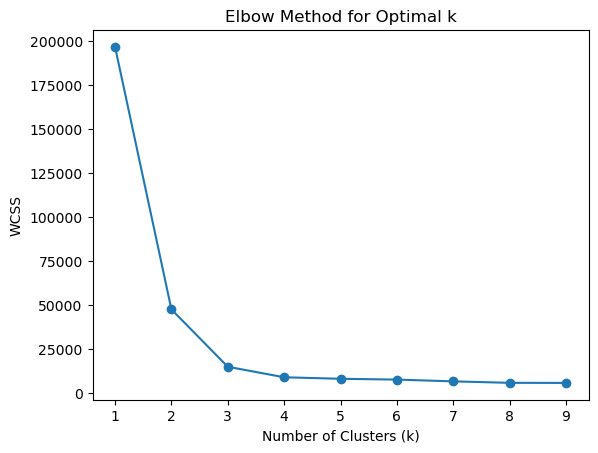

In [17]:
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


In [12]:
def silhouette_score(data, labels, centroids):
    silhouette_scores = []
    for idx, point in enumerate(data):
        cluster_label = labels[idx]
        
        same_cluster_points = data[labels == cluster_label]
        a_i = np.mean(np.sqrt(((same_cluster_points - point) ** 2).sum(axis=1)))
        
        min_dist = float('inf')
        for label in set(labels):
            if label != cluster_label:
                other_cluster_points = data[labels == label]
                b_i = np.mean(np.sqrt(((other_cluster_points - point) ** 2).sum(axis=1)))
                if b_i < min_dist:
                    min_dist = b_i
        
        b_i = min_dist
        s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(s_i)
    
    return np.mean(silhouette_scores)


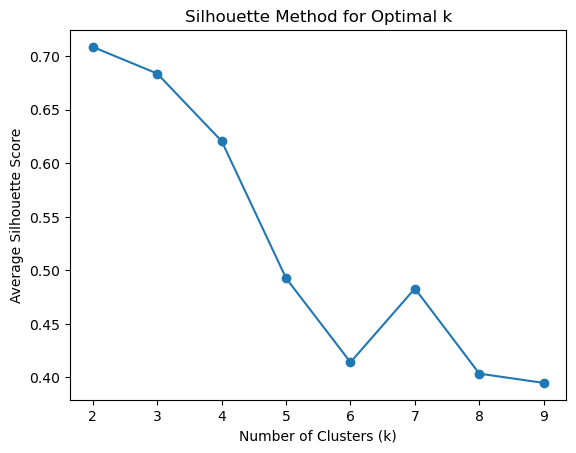

In [23]:
silhouette_scores = []
k_values = range(2, 10) 
for k in k_values:
    centroids, labels = kmeans(data, k)
    avg_silhouette = silhouette_score(data, labels, centroids)
    silhouette_scores.append(avg_silhouette)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17632\3735893349.py:18: RuntimeWarning: invalid value encountered in scalar divide
  s_i = (b_i - a_i) / max(a_i, b_i)


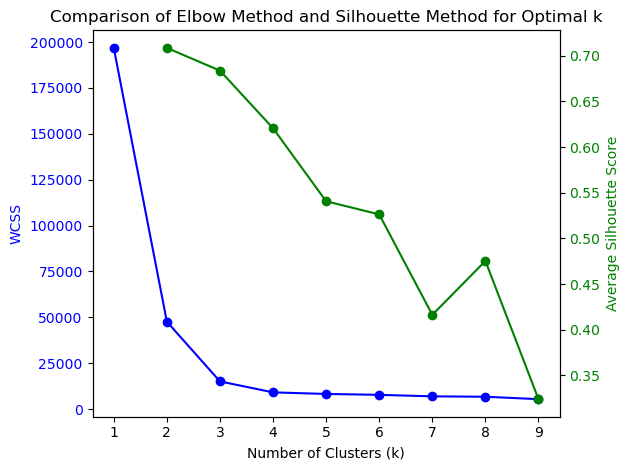

In [20]:
wcss_values = []
silhouette_scores = []

k_values = range(1, 10)

for k in k_values:
    centroids, labels = kmeans(data, k)
    wcss = calculate_wcss(data, centroids, labels)
    wcss_values.append(wcss)
    avg_silhouette = silhouette_score(data, labels, centroids)
    silhouette_scores.append(avg_silhouette)

fig, ax1 = plt.subplots()

ax1.plot(k_values, wcss_values, 'bo-', label='WCSS (Elbow Method)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('WCSS', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, 'go-', label='Silhouette Score')
ax2.set_ylabel('Average Silhouette Score', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Comparison of Elbow Method and Silhouette Method for Optimal k')
fig.tight_layout()
plt.show()


## 2) k-Means on country-continent dataset

a) Read the dataset from the CSV file.

b) Get the unique continents from the dataset.

c) Map text data to numbers.

d) Run the k-means algorithm with the number of continents clusters.

e) Plot the results.

Ques- Compare the results with different number of clusters. What do you observe?

In [25]:
import pandas as pd

file_path = 'countries_continents.csv'
data = pd.read_csv(file_path)

print(data.head())

       Country  Longitude   Latitude      Continent
0        Aruba -69.982677  12.520880  North America
1  Afghanistan  66.004734  33.835231           Asia
2       Angola  17.537368 -12.293361         Africa
3     Anguilla -63.064989  18.223959  North America
4      Albania  20.049834  41.142450         Europe


In [26]:
unique_continents = data['Continent'].unique()
print("Unique continents:", unique_continents)

Unique continents: ['North America' 'Asia' 'Africa' 'Europe' 'South America' 'Oceania'
 'Antarctica' 'Seven seas (open ocean)']


In [28]:
continent_mapping = {continent: idx for idx, continent in enumerate(unique_continents)}
data['Continent_Num'] = data['Continent'].map(continent_mapping)

features = data.select_dtypes(include=[np.number])
num_clusters = len(unique_continents)
centroids, labels = kmeans(features.values, num_clusters)

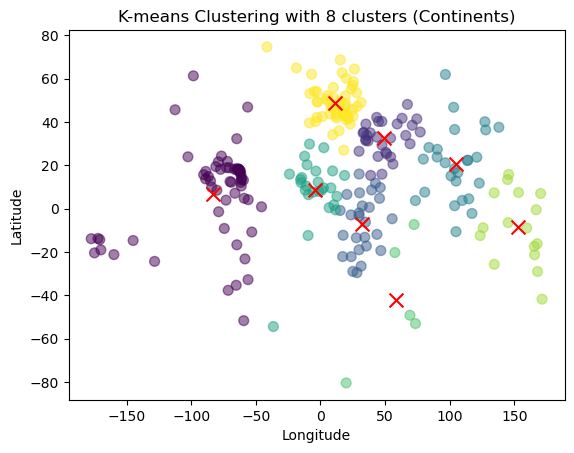

In [29]:
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100)
plt.title(f'K-means Clustering with {num_clusters} clusters (Continents)')
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.show()

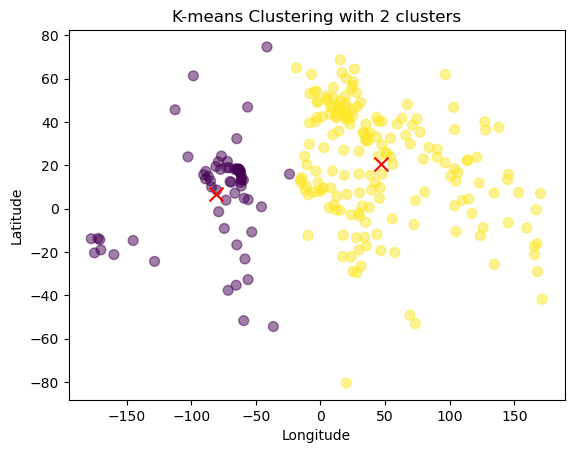

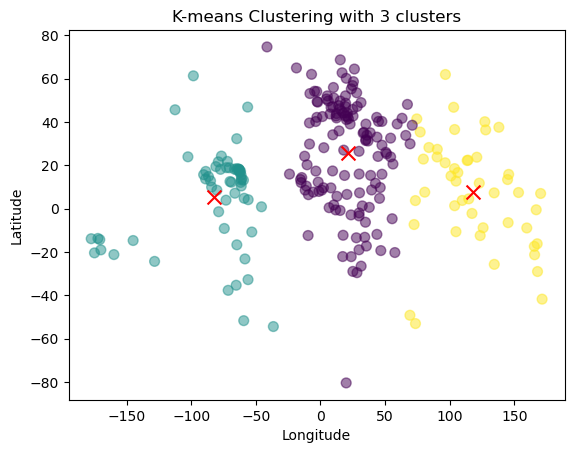

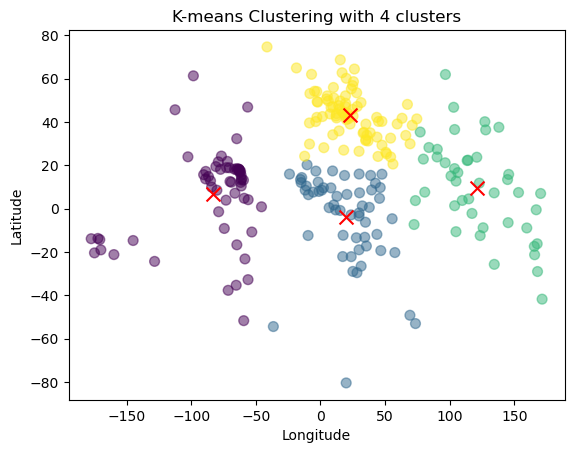

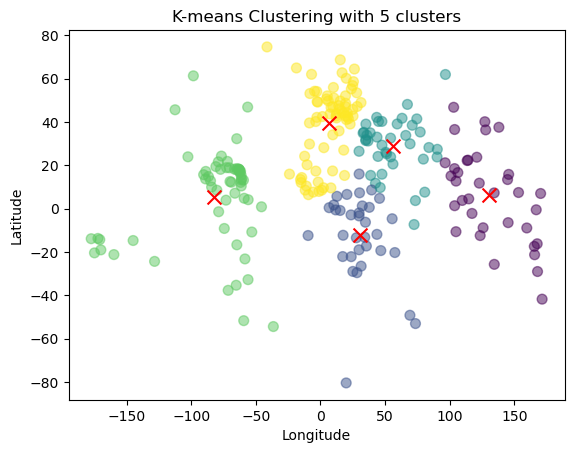

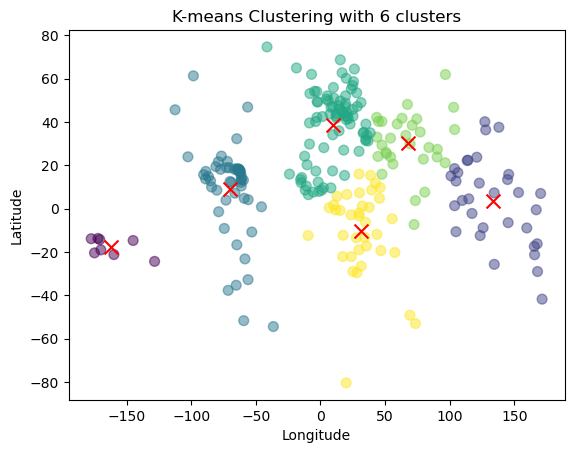

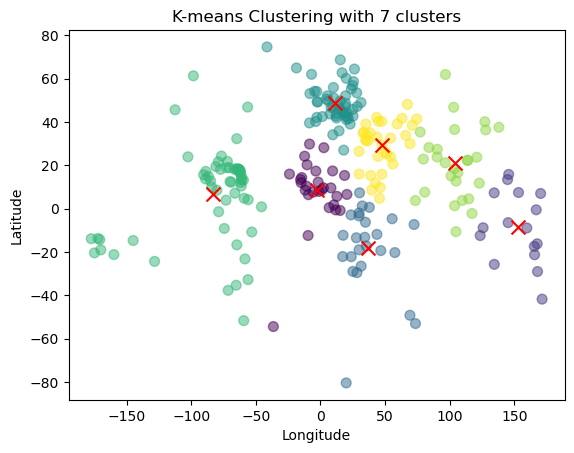

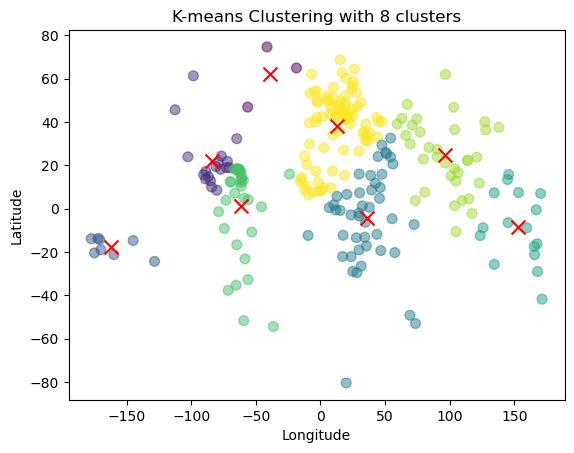

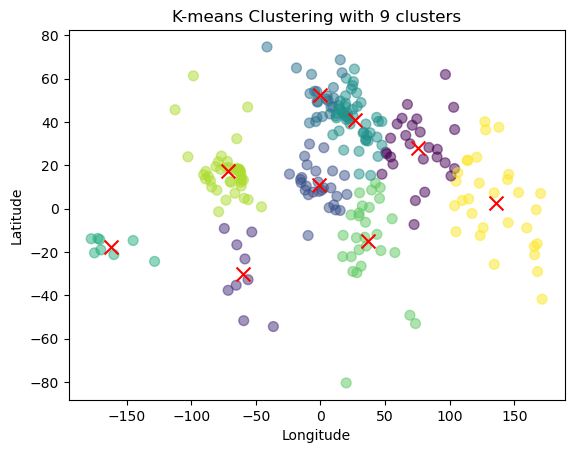

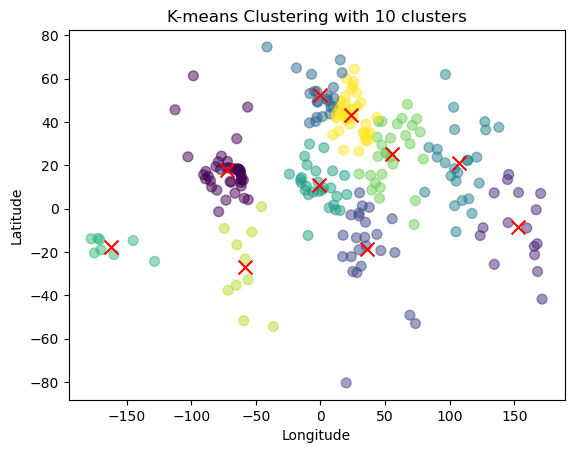

In [30]:
for k in range(2, num_clusters + 3):
    centroids, labels = kmeans(features.values, k)
    plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100)
    plt.title(f'K-means Clustering with {k} clusters')
    plt.xlabel(features.columns[0])
    plt.ylabel(features.columns[1])
    plt.show()

## 3) k-Means++ on country-continent dataset

a) Read the dataset from the CSV file.

b) Get the unique continents from the dataset.

c) Map text data to numbers.

d) Run the k-means++ algorithm with the number of continents clusters.

e) Plot the results.

Ques- Compare the results with different number of clusters. What do you observe?

In [31]:
def kmeans_plus_plus_init(data, k):
    centroids = []
    centroids.append(data[np.random.choice(data.shape[0])])

    for _ in range(1, k):
        dist_sq = np.min([np.sum((data - centroid) ** 2, axis=1) for centroid in centroids], axis=0)
        prob_dist = dist_sq / dist_sq.sum()
        next_centroid = data[np.random.choice(data.shape[0], p=prob_dist)]
        centroids.append(next_centroid)

    return np.array(centroids)

In [32]:
def kmeans_with_plus_plus(data, k, max_iters=100):
    centroids = kmeans_plus_plus_init(data, k)
    for _ in range(max_iters):
        distances = np.sqrt(((data - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

num_clusters = len(unique_continents)
centroids, labels = kmeans_with_plus_plus(features.values, num_clusters)

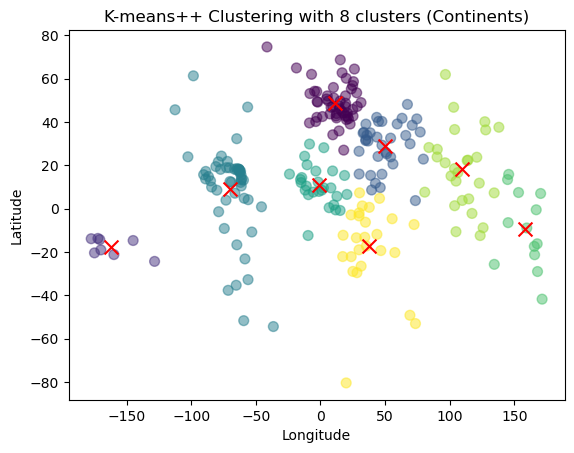

In [33]:
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100)
plt.title(f'K-means++ Clustering with {num_clusters} clusters (Continents)')
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.show()

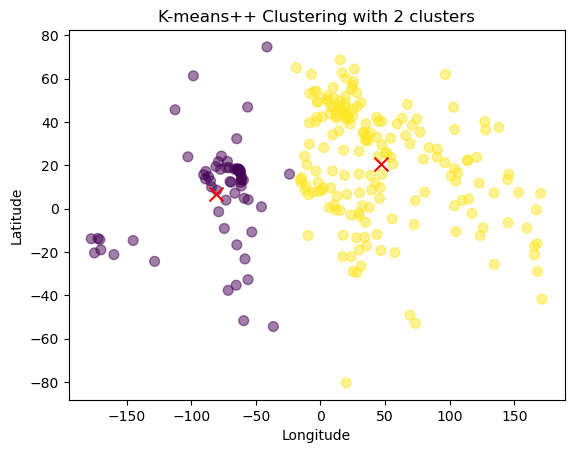

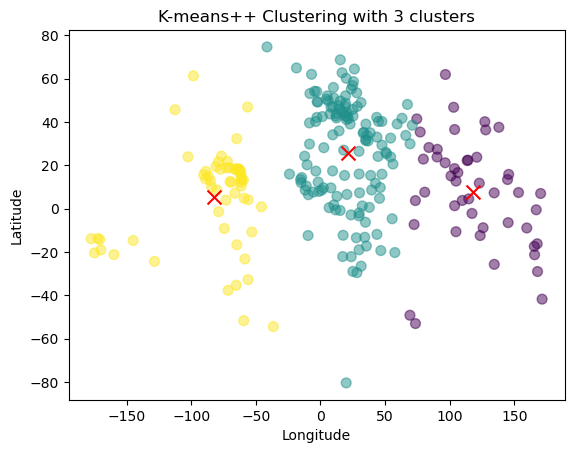

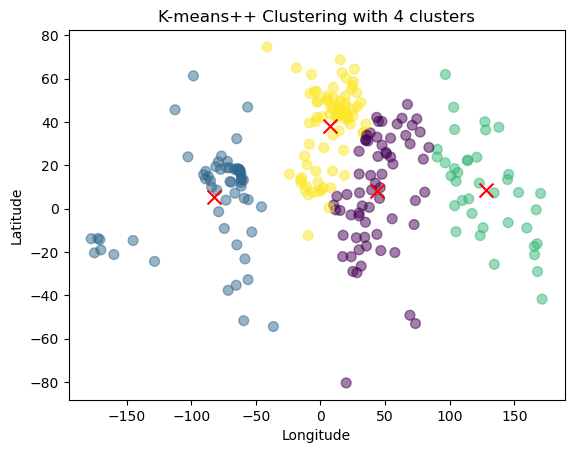

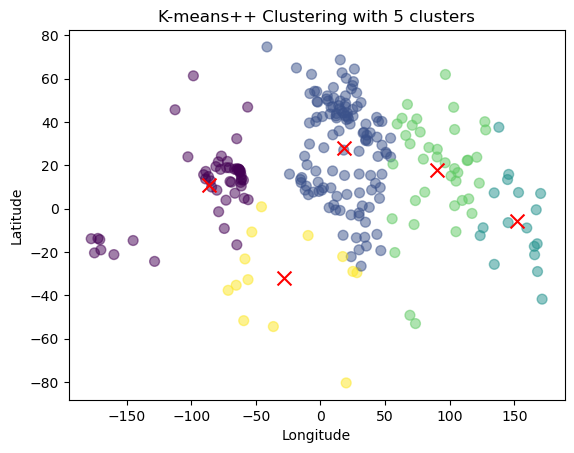

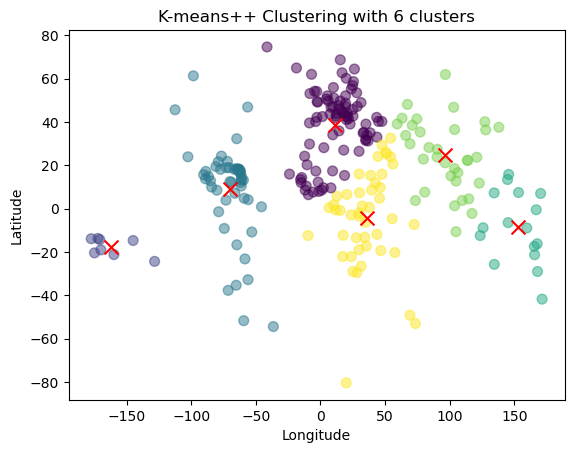

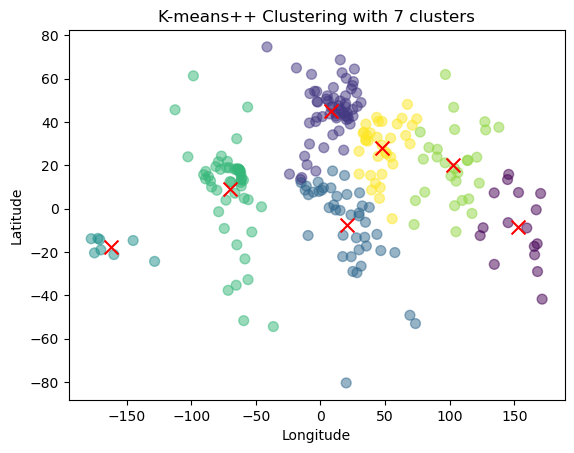

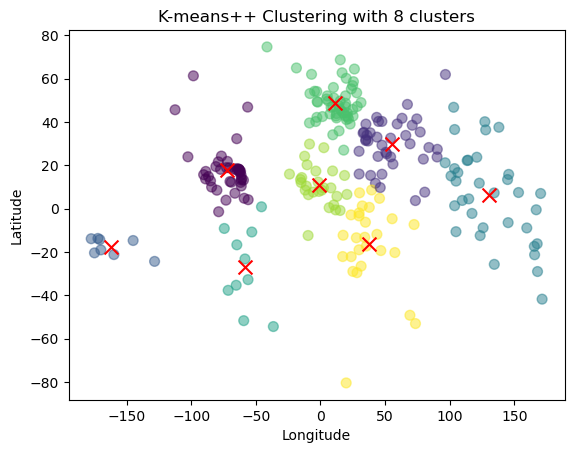

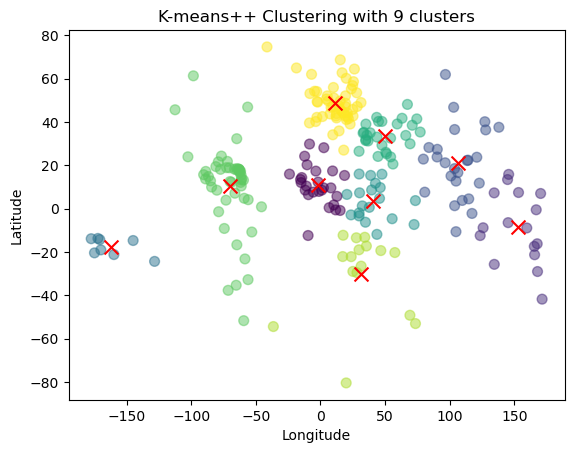

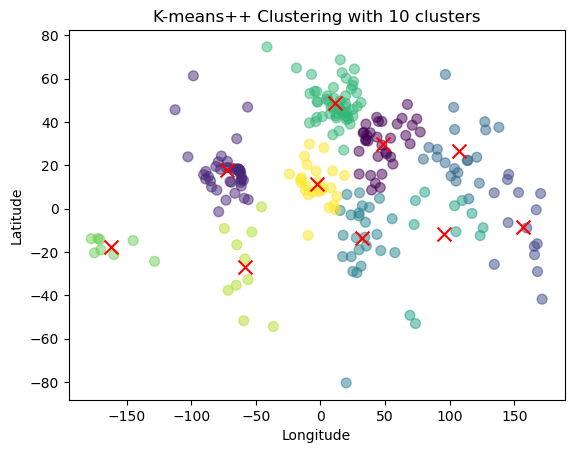

In [34]:
for k in range(2, num_clusters + 3): 
    centroids, labels = kmeans_with_plus_plus(features.values, k)
    plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100)
    plt.title(f'K-means++ Clustering with {k} clusters')
    plt.xlabel(features.columns[0])
    plt.ylabel(features.columns[1])
    plt.show()